- [Overview](#Overview)
- [Imports](#Imports)
- [Customization](#Customization)
- [hist](#hist)
- [boxplot, violinplot](#boxplot,-violinplot)
- [bar](#bar)
- [pie](#pie)
- [scatter](#scatter)
- [plot](#plot)
- [second y-axis](#second-y-axis)
- [plot_date](#plot_date)
- [fill_between](#fill_between)
- [polar](#polar)
- [contour, contourf](#contour,-contourf)
- [pcolor, pcolormesh](#pcolor,-pcolormesh)
- [acorr and xcorr](#acorr-and-xcorr)
- [subplots](#subplots)
- [text and annotate](#text-and-annotate)
- [Patches](#Patches)
- [Diagrams](#Diagrams)
- [imshow, matshow, hist2d](#imshow,-matshow,-hist2d)
- [3D plots](#3D-plots)

### Overview

Matplotlib is a visualization library exposing object-oriented interface. It is a good choice if you need to quickly produce a large amount of graphs. 

If you need to explore the data and experiment, Matplotlib's Pyplot interface is easier. Matplotlib (freq. abbreviated by mpl) and Pyplot (freq. abbreviated by plt) have corresponding methods with the same functionality; e.g. mpl.ax.set_limit(0,1) and plt.xlim(0,1)

In Matplotlib, the whole window in the user interface is called Figure. A Figure can have many Axes which are the areas where your plots appear. They are sort of subfigures and can be positioned either inside a regular grid, in which case they are called subplots, or at an arbitrary location, in which case they are called subaxes.

Plotting is done with respect to an Axes. Axes (ie "subfigure") is made up of other objects such as Axis (ie the lines x-axis and y-axis), ticks on the axis, tick labels, and others.


### Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.__version__

'3.0.2'

In [2]:
from datetime import datetime, timedelta
from numpy.random import rand, randint, randn, uniform, normal, standard_t
from numpy.random import multivariate_normal, beta, gamma, dirichlet

### Customization

To customize plotting, use plt.rcParams (or mpl.rc). E.g.: plt.rcParams['figure.figsize'] = 10, 5 (or mpl.rc('lines', linewidth=2, color='r')

Among other things, you can customize the following objects' parameters:

    - figure: dpi, edge color, figsize, subplots
    - axes: color, grid display, tick sizes
    - lines: color, linewidth, markers, style, width
    - ticks: color, size, direction, labels
    - grid: grid color, lines
    - legend: color, text
    - text: color
    - font: font family, size, style
    - patch: object, linewidth, color

    E.g.
        lines.styles = '-' '--' ':' '-.'
        lines.markers = '.' ',' '*' '+' 'x' 'o' 's' 'p' 'h' '8' 
                        'v' '^' '<' '>' '-' '|' 'd' 'D' 'h' 'H'
        text.color = 'b' - Blue
                     'g' - Green
                     'r' - Red
                     'c' - Cyan
                     'm' - Magenta
                     'y' - Yellow
                     'k' - blacK
                     'w' - White
                     '#RRGGBB' - # HTML style, e.g. color='#aabbcc'

In [3]:
plt.style.available # displays available styles

['ggplot',
 'bmh',
 'fivethirtyeight',
 'seaborn-ticks',
 'fast',
 'seaborn-white',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-notebook',
 'Solarize_Light2',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-bright',
 'tableau-colorblind10',
 'seaborn-talk',
 'seaborn',
 'seaborn-deep',
 '_classic_test',
 'classic',
 'seaborn-whitegrid',
 'seaborn-muted',
 'seaborn-darkgrid',
 'grayscale']

In [4]:
plt.style.use('fivethirtyeight') # selects seaborn style

### hist

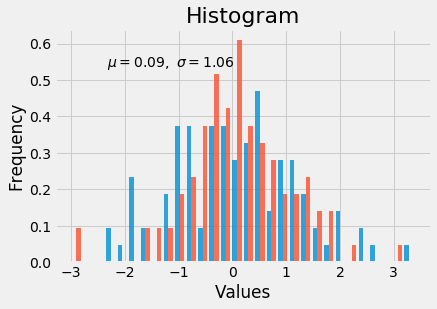

In [5]:
# generate random data 
d = randn(100, 2)

plt.hist(d, density=True, stacked=False, alpha=.8, bins=30)

plt.figtext(.2, .75,                    # coord with respect to the whole figure
            r'$\mu=%.2f,\ \sigma=%.2f$' # text surrounded by $ is treated as "mathtext"
            % (np.mean(d),np.std(d)))                               
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram',fontsize=22);

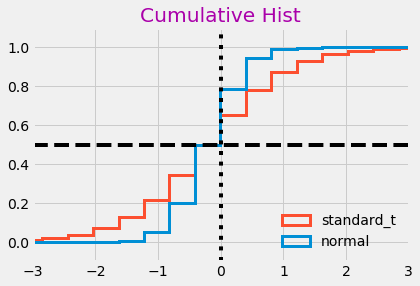

In [6]:
# generate random data 
n = normal(loc=0, scale=.5, size=10000)
t = standard_t(df=10, size=10000)

plt.hist([n,t], 
         density=True, cumulative=True, bins=30,
         histtype='step', lw=3, # lw - linewidth
         label=['normal','standard_t'])

plt.xlim(-3, 3) # x axis limits
plt.ylim(-0.1,1.1)

# draw horizontal line at y=0.5 with color=blacK, and dashed linestyle = '--'
plt.axhline(0.5, c='k', ls='--')
plt.axvline(0, c='k', ls=':') 

plt.grid(True)
plt.legend(loc='lower right', frameon=False)
plt.title('Cumulative Hist', color='#AA00AA');

### boxplot, violinplot

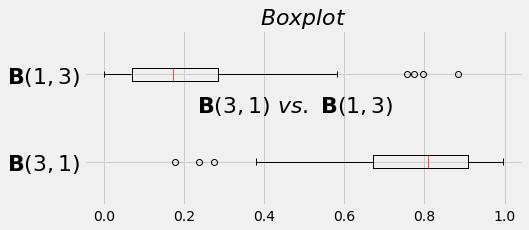

In [7]:
N = 100
d1 = beta(3,1,N)
d2 = beta(1,3,N)

fig, ax = plt.subplots(figsize=(7, 3)) # returns new Figure and Axes (i.e. a drawing area)

ax.boxplot((d1,d2), vert=False) # horizontal alignment

ax.text(.5,.5,   # this is more general than figtext in that you can define coord in transform=
        r'$\mathbf{B}(3,1)\ vs.\ \mathbf{B}(1,3)$', fontsize=22, 
        horizontalalignment='center',
        transform=plt.gcf().transFigure)  # draw text with respect to the figure
# gcf() - gets the current figure
# similarily, gca() - gets the current axes
# transform - defines how to transform coordinates; the allowable values are:
    # Axes.transData - user's data coordinate system
    # Axes.transAxes - (0,0) represents the bottom-left end of the Axes and (1,1) represents the upper-right
    # Figure.transFigure - (0,0) represents the bottom-left end of the Figure and (1,1) represents the upper-right
    
ax.set_yticklabels( (r'$\mathbf{B}(3,1)$', r'$\mathbf{B}(1,3)$'), fontsize=22)
plt.title(r'$Boxplot$', fontsize=22);

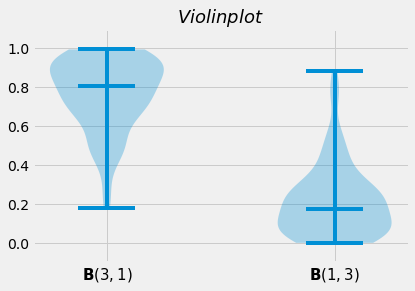

In [8]:
plt.violinplot((d1,d2), showmeans=False, showmedians=True )

plt.ylim(-0.1,+1.1)
plt.xticks((1,2),(r'$\mathbf{B}(3,1)$', r'$\mathbf{B}(1,3)$'), fontsize=15)
plt.title('$Violinplot$', fontsize=18);

### bar

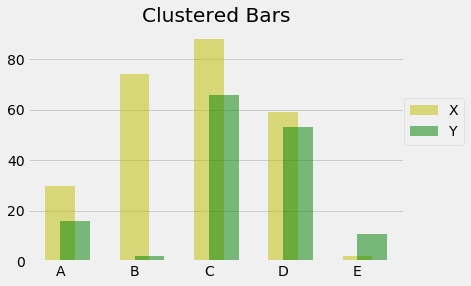

In [9]:
d = randint(0,100,size=(5,2))
groups = np.arange(5); labels = ('ABCDE')

plt.bar(x=groups,    height=d[:,0], width=.4, color='y', alpha=.5)
plt.bar(x=groups+.2, height=d[:,1], width=.4, color='g', alpha=.5)

plt.xticks(groups, labels)
plt.legend(['X','Y'],loc=(1,0.5)) # lower left corner at the (1,0.5) Fig. coord.
plt.grid(axis='x')
plt.title('Clustered Bars');

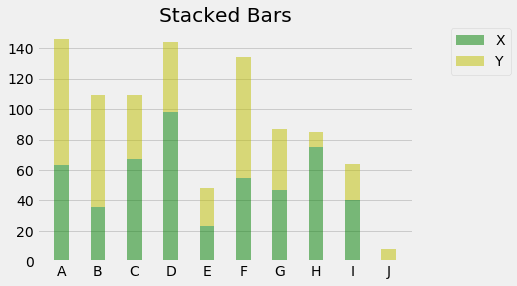

In [10]:
d = np.random.randint(0,100,size=(10,2))
groups = np.arange(10); labels = ('ABCDEFGHIJ')

plt.bar(groups, d[:,0],                width=.4, color='g', alpha=.5)
plt.bar(groups, d[:,1], bottom=d[:,0], width=.4, color='y', alpha=.5)

plt.xticks(groups, labels)
plt.grid(axis='x')
plt.legend(['X','Y'],loc=(1.1,.8))
plt.title('Stacked Bars');

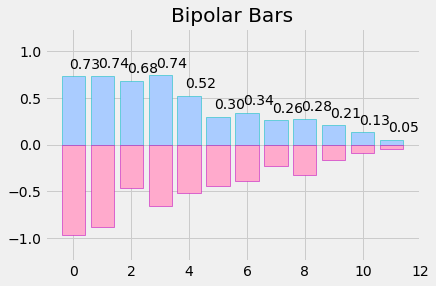

In [11]:
N = 12
X = np.arange(N)
Y1 = (1-X/float(N)) * uniform(0.5,1.0,N)
Y2 = (1-X/float(N)) * uniform(0.5,1.0,N)

plt.bar(X, +Y1, facecolor='#aaccff', edgecolor='c')
plt.bar(X, -Y2, facecolor='#ffaacc', edgecolor='m')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

plt.ylim(-1.25,+1.25)
plt.title('Bipolar Bars');

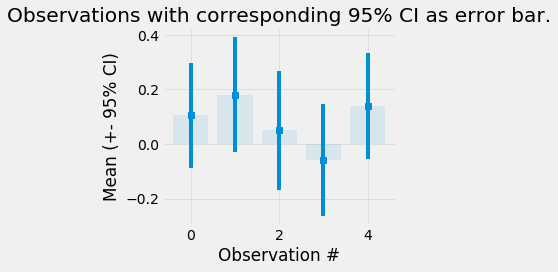

In [12]:
data = np.array(randn(100,5))
averages = np.mean(data, axis=0)

from scipy.stats import sem # std. err. of the mean
std_err = sem(data, axis=0)

x = np.arange(0, len(averages), 1.0)

plt.bar(x, averages, align='center', alpha=0.1)
plt.errorbar(x, averages, yerr=1.96*std_err, fmt='s')

plt.grid(True, alpha=0.5)
plt.xlabel('Observation #')
plt.ylabel('Mean (+- 95% CI)')
plt.title("Observations with corresponding 95% CI as error bar.")

plt.autoscale()
plt.tight_layout();

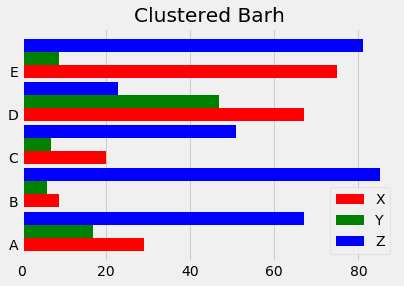

In [13]:
# generate random data 
d = randint(0,100,size=(5,3))

# show the clustered/grouped/unstacked horizontal bar chart
position = np.arange(5)

plt.barh(position,      d[:,0], height=.3, color='r')
plt.barh(position + .3, d[:,1], height=.3, color='g')
plt.barh(position + .6, d[:,2], height=.3, color='b')

plt.yticks(position, list('ABCDE'))
plt.legend(['X','Y','Z'], framealpha=.8)
plt.grid(axis='y')
plt.title('Clustered Barh');

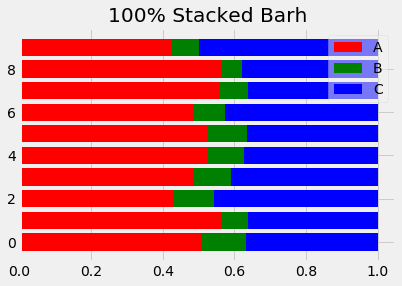

In [14]:
# generate random data 
d = dirichlet((50, 10, 40), 10).T
# show the stacked horizontal bar chart
position = range(10)

plt.barh(position, d[0], color='r')
plt.barh(position, d[1], left=d[0], color='g')
plt.barh(position, d[2], left=d[0]+d[1], color='b')

plt.legend(['A','B','C'], framealpha=.5)
plt.title("100% Stacked Barh");

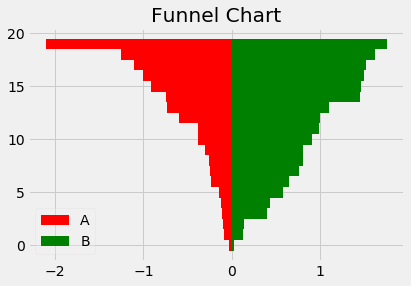

In [15]:
d = np.sort(np.abs( randn(20,2) ), axis=0)

plt.barh(range(20), -d[:,0], color='r', height=1)
plt.barh(range(20),  d[:,1], color='g', height=1)

plt.legend(['A','B'], framealpha=.3)
plt.title("Funnel Chart");

### pie

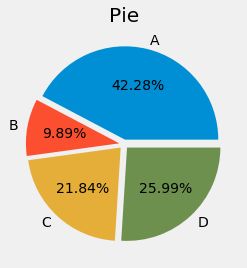

In [16]:
d = dirichlet((40, 10, 25, 25))
labels = ['A','B','C','D']

plt.pie(d,labels=labels, autopct='%.2f%%', explode=[.05]*len(labels))
plt.title('Pie');

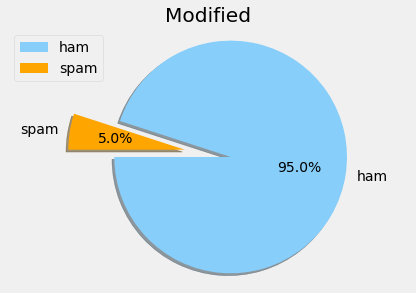

In [17]:
def draw_fancy_piechart():
    plt.pie(
        (95,5),
        labels=('ham','spam'),
        shadow=True,
        colors=('lightskyblue', 'orange'),
        explode=(0.2,0.2), # space between slices 
        startangle=180,    # rotate conter-clockwise by 90 degrees
        autopct='%1.1f%%',# display fraction as percentage
        ) 
    plt.axis('equal')     # plot pyplot as circle
    plt.tight_layout()
    plt.title('Modified')
    plt.legend(fancybox=True)
    
draw_fancy_piechart()

### scatter

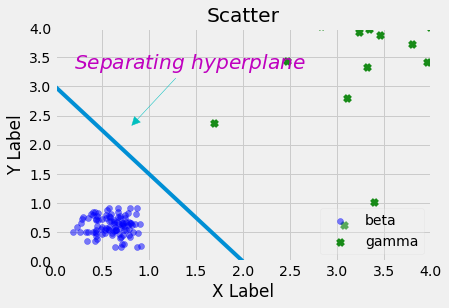

In [18]:
d = beta(5,3,size=(100,2))
d2 = gamma(5,1,size=(100,2))

plt.scatter(d[:,0],  d[:,1],  c='b', marker='o', alpha=.5, label='beta')
plt.scatter(d2[:,0], d2[:,1], c='g', marker='x', alpha=.9, label='gamma')

# plot a line form (0,3) to (3,0)
plt.plot([0,2],[3,0])

plt.annotate('$Separating\ hyperplane$',
            xy = (.8, 2.3),   
            color='m',
            xytext = (0.2, 3.2),
            xycoords='data', #coords with respect to data values
            ha = 'left', va = 'bottom', # horizontal and vertical aligment
            fontsize='x-large',
            arrowprops=dict(arrowstyle="-|>",color='c'))

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.xlim(0,4)
plt.ylim(0,4)

plt.grid(True)
plt.legend(framealpha=.3, loc="lower right")
plt.title('Scatter');

### plot

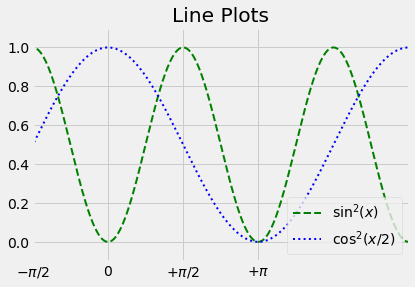

In [19]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)

plt.plot(x,np.sin(x)**2,   'g--', lw=2, label=r'$\sin^2(x)$')
plt.plot(x,np.cos(x/2)**2, 'b:',  lw=2, label=r'$\cos^2(x/2)$')

plt.xticks( [-np.pi,    -np.pi/2,    0,      np.pi/2,     np.pi],
            [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'] )

plt.xlim(-np.pi/2,2*np.pi)
plt.ylim(-0.1,1.1)

plt.legend()
plt.title('Line Plots');

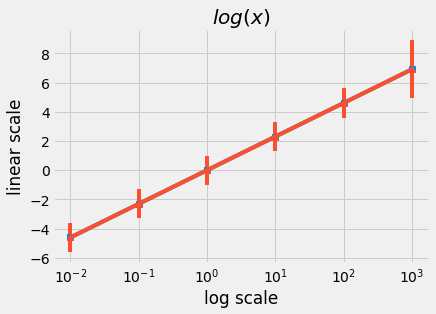

In [20]:
x = np.logspace(-2, 3, 6, base=10)

plt.plot(x, np.log(x), marker='s')
plt.errorbar(x, np.log(x), yerr=randint(1,3,len(x)), fmt='-^')

plt.xscale('log')
plt.yscale('linear')
plt.xlabel('log scale')
plt.ylabel('linear scale')
plt.title( r'$log(x)$');

### second y-axis

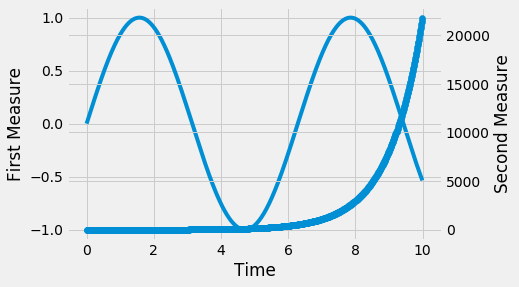

In [21]:
t = np.arange(0,10,0.01)
plt.plot(t,np.sin(t))
plt.xlabel('Time')
plt.ylabel('First Measure')

plt.twinx()
plt.scatter(t,np.exp(t))
plt.ylabel('Second Measure');

### plot_date

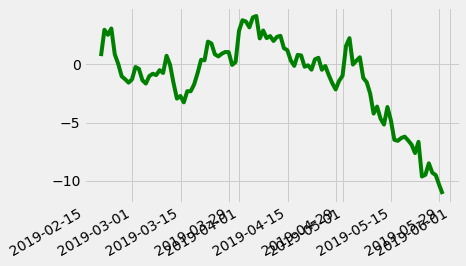

In [22]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
import datetime 
dstart = datetime.datetime.today()
dstop = dstart + datetime.timedelta(100)
delta = datetime.timedelta(days = 1)
mpl_dates = mpl.dates.drange(dstart, dstop, delta)

values = np.cumsum(randn(len(mpl_dates)))
plt.plot_date(mpl_dates, values, 'g-')
plt.gcf().autofmt_xdate(rotation=30) #get current figure and rotate x labels

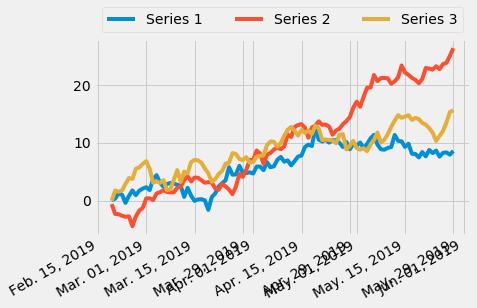

In [23]:
fig = plt.figure() # create new figure
ax = plt.gca() # get the current axes (plot)

dstart = datetime.date.today()
dstop = dstart + timedelta(100)
delta = timedelta(days = 1)
mpl_dates = mpl.dates.drange(dstart, dstop, delta)

values =  np.cumsum(randn(len(mpl_dates)))
values2 = np.cumsum(randn(len(mpl_dates)))
values3 = np.cumsum(randn(len(mpl_dates)))

ax.plot_date(mpl_dates, values,  ls='-', marker='', label='Series 1')
ax.plot_date(mpl_dates, values2, ls='-', marker='', label='Series 2')
ax.plot_date(mpl_dates, values3, ls='-', marker='', label='Series 3')

date_format = mpl.dates.DateFormatter('%b. %d, %Y')
ax.xaxis.set_major_formatter(date_format) #get current axis and set date formating
fig.autofmt_xdate(rotation=30) #get current figure and rotate x labels
    
plt.legend(loc='upper center', 
           bbox_to_anchor=(0,0.2,1,1), 
           mode='expand', #strech the legend
           ncol=3);

### fill_between

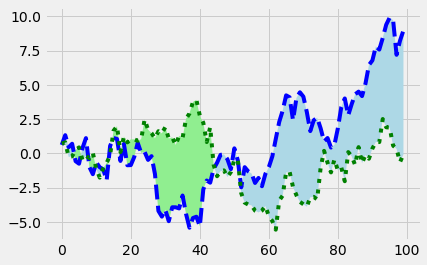

In [24]:
N = 100
x = np.arange(N)
y1 = np.cumsum(randn(N))
y2 = np.cumsum(randn(N))

plt.plot(x,y1,'b--', x,y2,'g:')
plt.fill_between(x, y1, y2, where=y2>=y1, facecolor='lightgreen', interpolate=True)
plt.fill_between(x, y1, y2, where=y2<=y1, facecolor='lightblue',  interpolate=True);

### polar

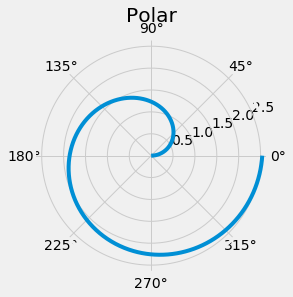

In [25]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.arcsinh(x)

plt.polar(x, y)
plt.title('Polar');

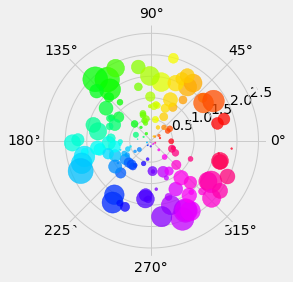

In [26]:
N = 150
r = 2 * rand(N)
theta = 2 * np.pi * rand(N)
area = 200 * r**2 * rand(N)
colors = theta

plt.subplot(111, polar=True)
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.hsv, alpha=.75);

### contour, contourf

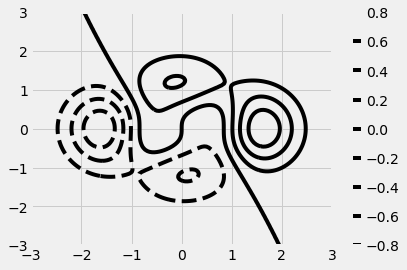

In [27]:
def func(x,y): 
    return (-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 128
xx = np.linspace(-3,3,n)
yy = np.linspace(-3,3,n)
X,Y = np.meshgrid(xx,yy)

plt.contour( X, Y, func(X,Y), 8, colors='k')
plt.colorbar();

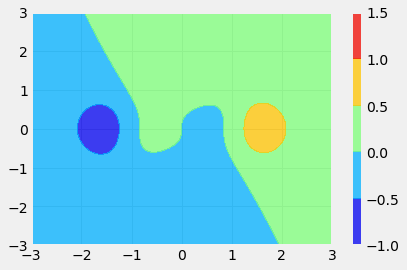

In [28]:
def func(x,y): 
    return (-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 128
xx = np.linspace(-3,3,n)
yy = np.linspace(-3,3,n)
X,Y = np.meshgrid(xx,yy)

contour_levels = [-1,-.5,0,.5,1,1.5]
plt.contourf(X, Y, func(X,Y), contour_levels, alpha=.75, cmap='jet')
plt.colorbar();

### pcolor, pcolormesh

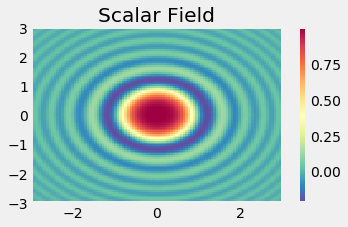

In [29]:
yy = xx = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = np.sinc(X**2 + Y**2)
plt.figure(figsize=(5,3))
plt.pcolor(X, Y, Z, cmap = plt.cm.Spectral_r)
plt.colorbar()
plt.title('Scalar Field');

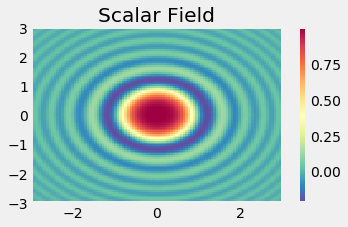

In [30]:
yy = xx = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = np.sinc(X**2 + Y**2)
plt.figure(figsize=(5,3))
plt.pcolormesh(X, Y, Z, cmap = plt.cm.Spectral_r) #pcolormesh is faster than pcolor
plt.colorbar()
plt.title('Scalar Field');

### acorr and xcorr

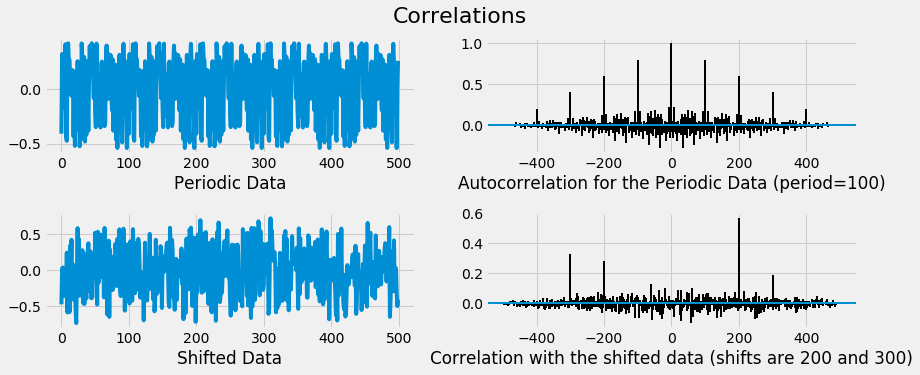

In [31]:
# generate random data
data = rand(500)
# compute the deviations from the mean
avg = np.mean(data)
z = [j - avg for j in data]

# take fist 100 elements and repeat 5x
periodic_data = np.tile(data[:100],5)
periodic_avg = np.mean(periodic_data)
periodic_z = [j - periodic_avg for j in periodic_data]

# adjust the fig size
plt.figure(figsize=(13,5))

# show the deviations of periodic data
plt.subplot(221)
plt.plot(periodic_z)
plt.xlabel('Periodic Data')

# Is there a pattern?
plt.subplot(222)
plt.xlabel('Autocorrelation for the Periodic Data (period=100)')
plt.acorr(periodic_z, normed=True, usevlines=True, maxlags=None,  lw=2)
plt.grid(True)

# now, let's introduce two shifts of 200 and 300 
# (the latter will be only half, i.e. 0.5x, as strong as the former)
shifted_data = np.r_[data[200:],data[:200]] + np.r_[0.5*data[300:],0.5*data[:300]]
shifted_avg = np.mean(shifted_data)
shifted_z = [j - shifted_avg for j in shifted_data]

# show the deviations of shifted data
plt.subplot(223)
plt.plot(shifted_z)
plt.xlabel('Shifted Data')

# Is there a correlation between z and shifted_z?
plt.subplot(224)
plt.xlabel('Correlation with the shifted data (shifts are 200 and 300)')
plt.xcorr( z, shifted_z, usevlines=True, maxlags=None, normed=True, lw=2)
# matplotlib's xcorr uses NumPy's correlate() function

plt.grid(True)
plt.figtext(0.5,1,'Correlations',fontsize=22,ha='center')
plt.autoscale()
plt.tight_layout();

### subplots

Text(0.5, 1.0, 'v vs. u')

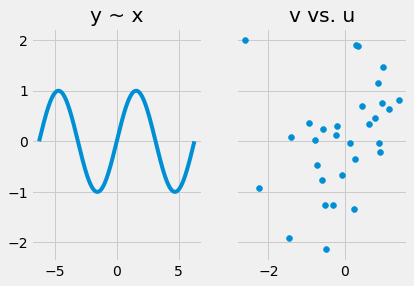

In [32]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.sin(x)
v = np.random.randn(30)
u = np.random.randn(30)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.plot(x, y)
ax1.set_title('y ~ x')
ax2.scatter(v, u)
ax2.set_title('v vs. u')

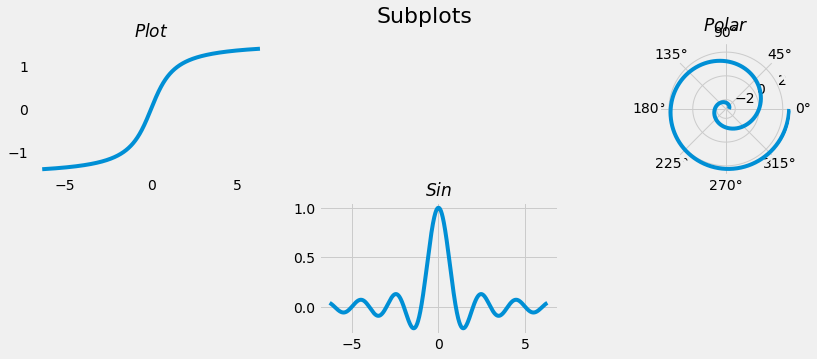

In [33]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

plt.figure(figsize=(13,5))

plt.subplot(2,3,1) # 1st plot in 2x3 grid
plt.plot(x, np.arctan(x))
#get current axes and show grid
plt.gca().grid()
plt.title('$Plot$',fontsize=17)

# 2nd plot is missing, so is 4th and 6th

plt.subplot(2,3,3, polar=True) # 3rd plot in 2x3 grid
plt.polar(x, np.arcsinh(x))
plt.title('$Polar$',fontsize=17)

plt.subplot(2,3,5) # 5th plot in 2x5 grid
plt.plot(x, np.sinc(x))
#set_title on the get current axes (subplot) and set_title
plt.gca().set_title('$Sin$',fontsize=17)

#get current figure (all the subplots) and set title 
plt.gcf().suptitle('Subplots',fontsize=22);

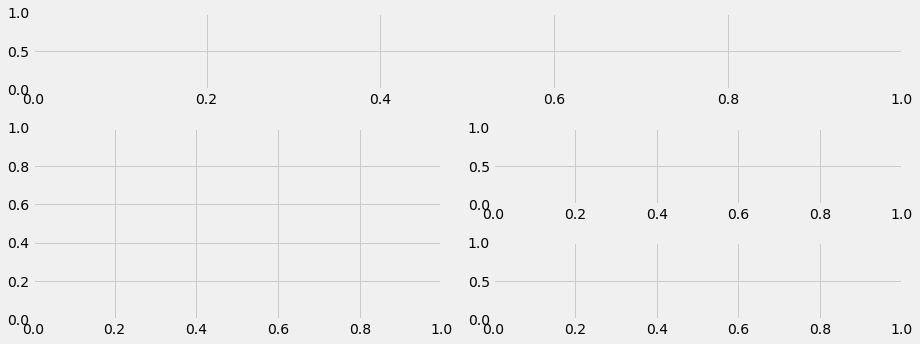

In [34]:
fig = plt.figure(figsize=(13,5))
fig.add_subplot(3,2,(1,2)) # top
fig.add_subplot(3,2,(3,5))  # left
fig.add_subplot(3,2,4)
fig.add_subplot(3,2,6);
plt.tight_layout(); #use tight when plots are smaller

### text and annotate

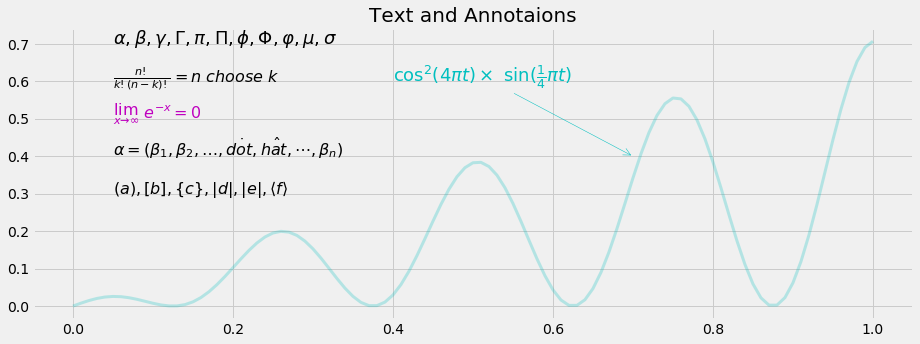

In [35]:
plt.figure(figsize=(13,5))
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4*np.pi*t)**2 * np.sin(np.pi*t/4)
plt.plot(t, s, alpha=0.25,c='c',lw=3)

plt.annotate(
    r'$\cos^2(4\pi t)\times\ \sin(\frac{1}{4}\pi t)$', 
    xy=(.7,0.4), 
    xytext=(.4, .6), 
    fontsize=18,
    color='c', 
    arrowprops=dict(color='c',arrowstyle='->')
)
plt.text(.05, .7,r'$\alpha,\beta,\gamma,\Gamma,\pi,\Pi,\phi,\Phi,\varphi,\mu,\sigma$',fontsize=18)
plt.text(.05, .6,r'$\frac{n!}{k!(n-k)!} = {n\ choose\ k} $',fontsize=16)
plt.text(.05, .5,r'$\lim_{x \to \infty}\ e^{-x} = 0$',fontsize=16,color='m')
plt.text(.05, .4,r'$\alpha = (\beta_1,\beta_2,\ldots, \dot{dot}, \hat{hat}, \cdots, \beta_n)$',fontsize=16)
plt.text(.05, .3,r'$( a ), [ b ], \{ c \}, | d |, \| e \|, \langle f \rangle$',fontsize=16)


plt.title('Text and Annotaions',fontsize=20)
plt.autoscale()
plt.tight_layout();

### Patches

In [36]:
import matplotlib.patches as patches

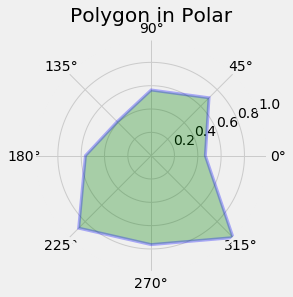

In [37]:
alpha = np.linspace( 0, 2 * np.pi, 8, endpoint = False )
radius = .2 + .8 * rand(len(alpha))
points = np.vstack((alpha, radius)).T

patch_poly = patches.Polygon( points, facecolor='g', edgecolor='b', lw=3, alpha=0.3 )

ax = plt.axes(polar = True)
plt.gca().add_patch(patch_poly)
plt.title('Polygon in Polar');

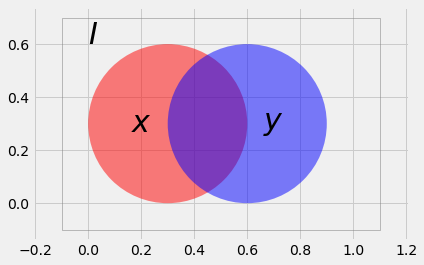

In [38]:
fig, ax = plt.subplots() # subplot_kw=dict(frameon=False, xticks=[], yticks=[]))
ax.add_patch(plt.Circle((0.3, 0.3), 0.3, fc='red', alpha=0.5))
ax.add_patch(plt.Circle((0.6, 0.3), 0.3, fc='blue', alpha=0.5))
ax.add_patch(plt.Rectangle((-0.1, -0.1), 1.2, 0.8, fc='none', ec='gray'))
ax.text(0.2, 0.3, '$x$', size=30, ha='center', va='center')
ax.text(0.7, 0.3, '$y$', size=30, ha='center', va='center')
ax.text(0.0, 0.6, '$I$', size=30)
ax.axis('equal');

### Diagrams

[0, 1, 0, 1]

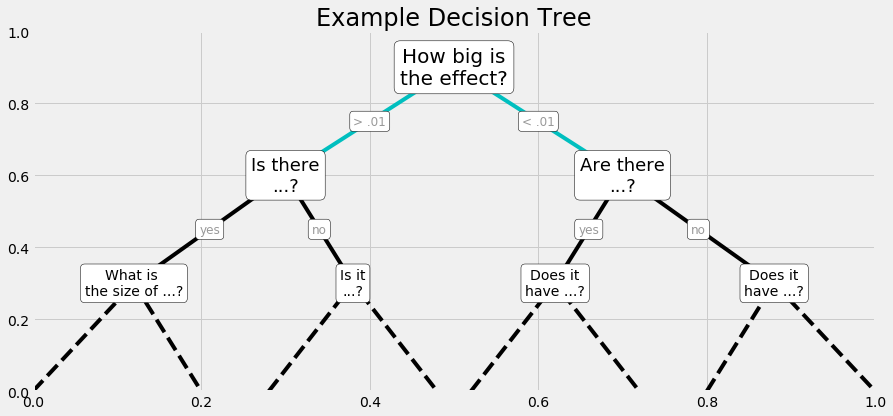

In [39]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_axes([0, 0, 0.9, 1]) #, frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "How big is\nthe effect?", 20)
text(ax, 0.3, 0.6, "Is there\n...?", 18)
text(ax, 0.7, 0.6, "Are there\n...?", 18)
text(ax, 0.12, 0.3, "What is \nthe size of ...?", 14)
text(ax, 0.38, 0.3, "Is it\n...?", 14)
text(ax, 0.62, 0.3, "Does it\nhave ...?", 14)
text(ax, 0.88, 0.3, "Does it\nhave ...?", 14)

text(ax, 0.4, 0.75, "> .01", 12, alpha=0.4)
text(ax, 0.6, 0.75, "< .01", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-c')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

### imshow, matshow, hist2d

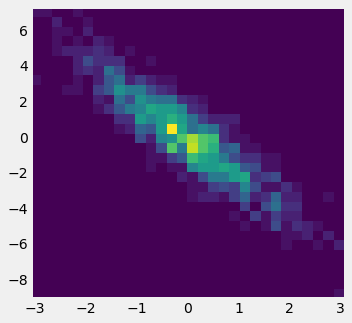

In [40]:
# Sample from a bivariate Gaussian distribution
mean = [0,0]
cov = [[1, -2], [-2, 5]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

f = plt.figure(figsize=(5,5))
a = f.add_subplot(111)
a.hist2d(x, y, bins=30, normed=True);

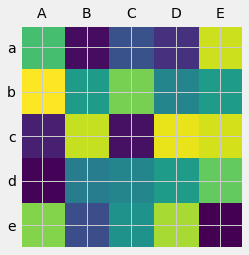

In [41]:
X = np.random.randint(1,100,(5,5))
cols = list('ABCDE')
rows = list('abcde')

plt.matshow(X)
plt.gca().set_xticklabels(['']+cols)
plt.gca().set_yticklabels(['']+rows);

In [42]:
df = pd.DataFrame (data=np.random.choice(('A','B','C','D','E'),(10,2)), columns=['X','Y'])
m = pd.crosstab(df.X,df.Y,normalize=True)
m

Y,A,B,D
X,,,
A,0.2,0.0,0.1
B,0.1,0.1,0.0
C,0.0,0.3,0.0
D,0.1,0.0,0.0
E,0.1,0.0,0.0


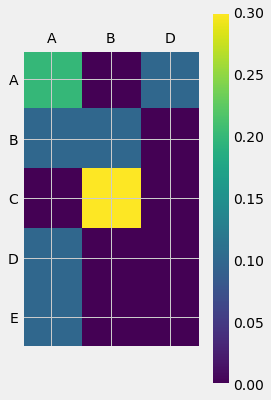

In [43]:
plt.matshow(m)
plt.gca().set_xticklabels(['0'] + list(m.columns))
plt.gca().set_yticklabels(['0'] + list(m.index))
plt.colorbar();

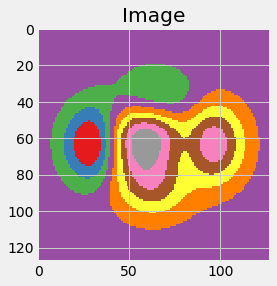

In [44]:
def func(x,y): 
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 128
xx = np.linspace(-3,3,n)
yy = np.linspace(-3,3,n)
X,Y = np.meshgrid(xx,yy)
Z = func(X,Y)

plt.imshow(Z, cmap = plt.cm.Set1)
plt.title('Image');

### 3D plots

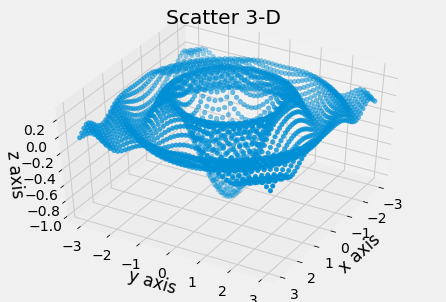

In [45]:
from mpl_toolkits.mplot3d import Axes3D

xx = yy = np.linspace(-3,3)
X, Y = np.meshgrid(xx, yy)
Z = - np.cos(X**2 + Y**2) / (1 + X**2 + Y**2)

fig = plt.figure()
ax = Axes3D(fig, elev=45, azim=30)

ax.scatter(X,Y,Z, zdir='z')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.title('Scatter 3-D');

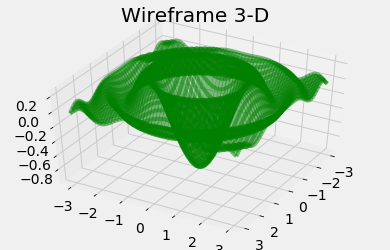

In [46]:
from mpl_toolkits.mplot3d import Axes3D

xx = yy = np.linspace(-3,3)
X, Y = np.meshgrid(xx, yy)
Z = - np.cos(X**2 + Y**2) / (1 + X**2 + Y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=45, azim=30) 

ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color='g', alpha=0.5)

plt.title('Wireframe 3-D');

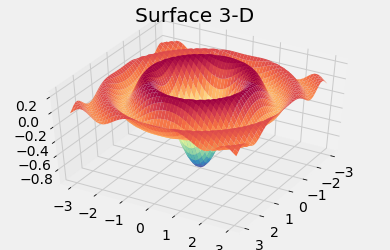

In [47]:
from mpl_toolkits.mplot3d import Axes3D

xx = yy = np.linspace(-3,3)
X, Y = np.meshgrid(xx, yy)
Z = - np.cos(X**2 + Y**2) / (1 + X**2 + Y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=45, azim=30) 

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.Spectral_r)

plt.title('Surface 3-D');

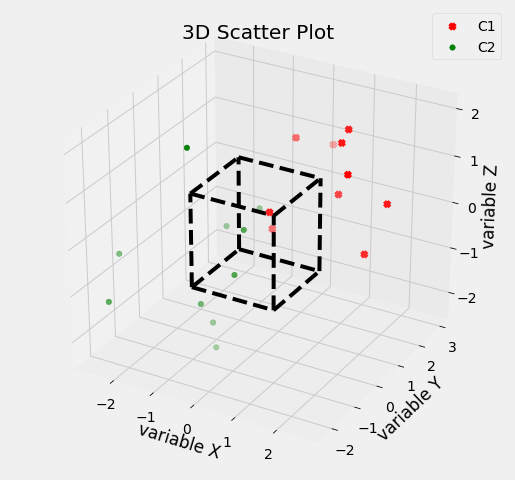

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt

# Generate some 3D sample data
mu_vec1 = np.array([0,0,0]) # mean vector
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # covariance matrix

class1_samp = np.random.multivariate_normal(mu_vec1 + 1, cov_mat1, 10)
class2_samp = np.random.multivariate_normal(mu_vec1 - 1, cov_mat1, 10)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


# Plot Cube
from itertools import product, combinations
h = [-1, 1]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="k", ls='--')
   
ax.scatter(class1_samp[:,0], class1_samp[:,1], class1_samp[:,2], marker='x', color='r', s=30, label='C1')
ax.scatter(class2_samp[:,0], class2_samp[:,1], class2_samp[:,2], marker='o', color='g', s=30, label='C2')

ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')

plt.legend()
plt.title('3D Scatter Plot');

### THE END